                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    str

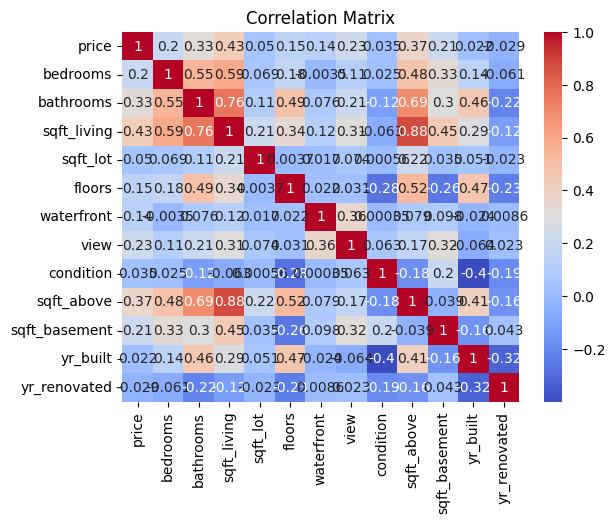

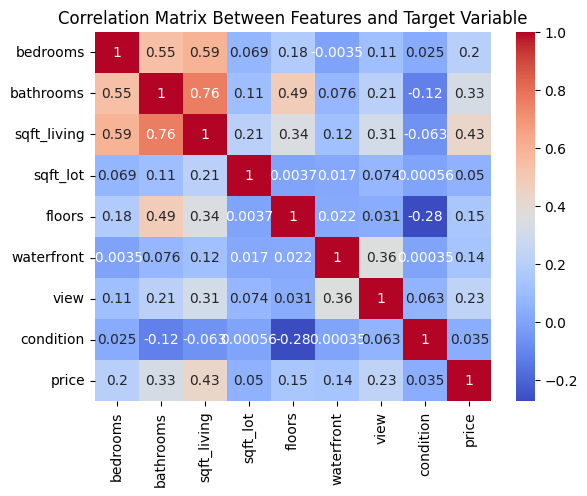

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


df = pd.read_csv('data.csv')


print(df.head())
print(df.describe())
print(df.isnull().sum())

df['date'] = pd.to_datetime(df['date'])

df_numeric = df.select_dtypes(include=['float64', 'int64'])


correlation_matrix = df_numeric.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition']]
y = df['price']


correlation_matrix_features = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'price']].corr()
sns.heatmap(correlation_matrix_features, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Between Features and Target Variable")
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
 y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 986869414953.98
R-squared: 0.03233518995632512


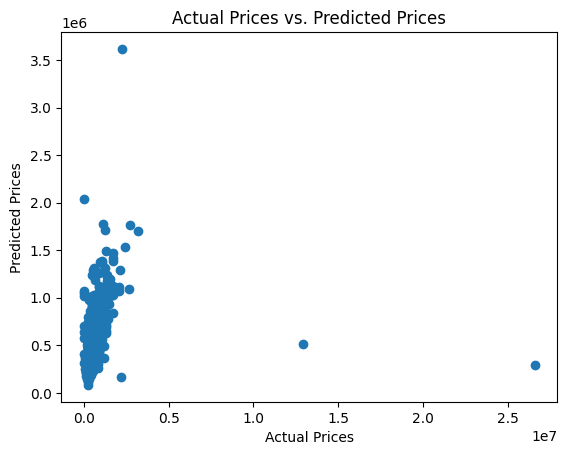

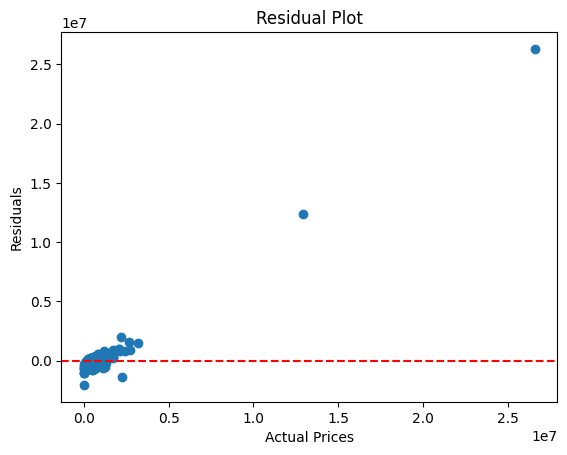

Predicted Price: 331038.9687692916


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()


residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


new_data = [[3, 2, 1500, 4000, 1, 0, 0, 3]]
predicted_price = model.predict(new_data)

print("Predicted Price:", predicted_price[0])

   CustomerID PurchaseDate  PurchaseAmount    Product
0         103   2023-12-31      411.204965  Product_F
1         436   2023-01-05      133.729287  Product_B
2         861   2023-04-29       10.504445  Product_F
3         271   2023-10-16       87.879759  Product_G
4         107   2023-03-06      239.584314  Product_F


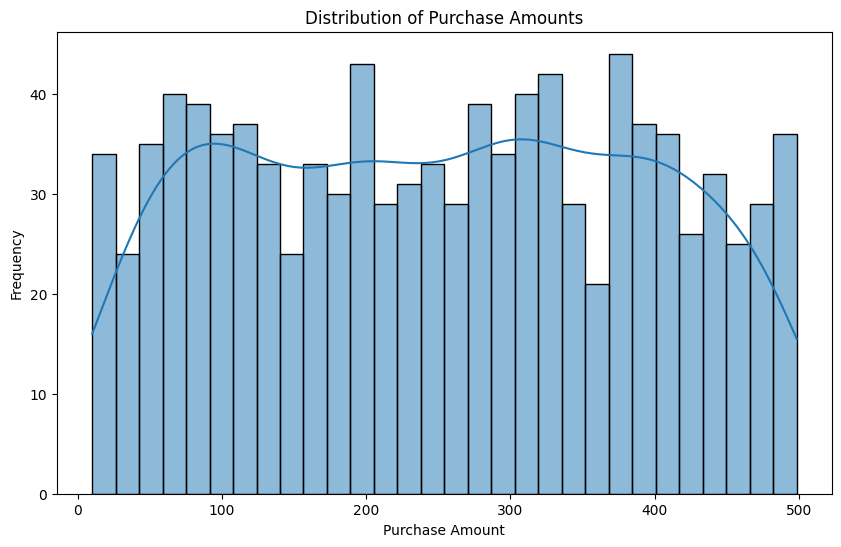

<ipython-input-10-15fb40f51e93>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Product', data=df, palette='viridis')


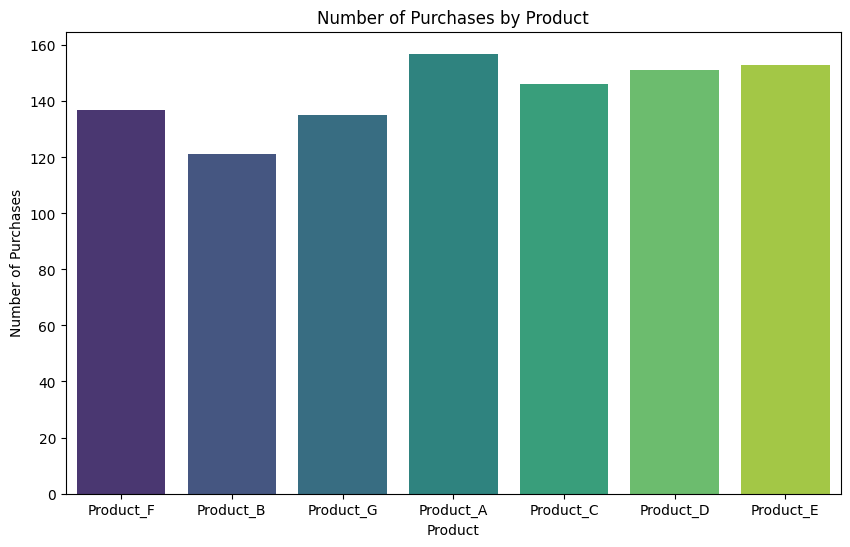

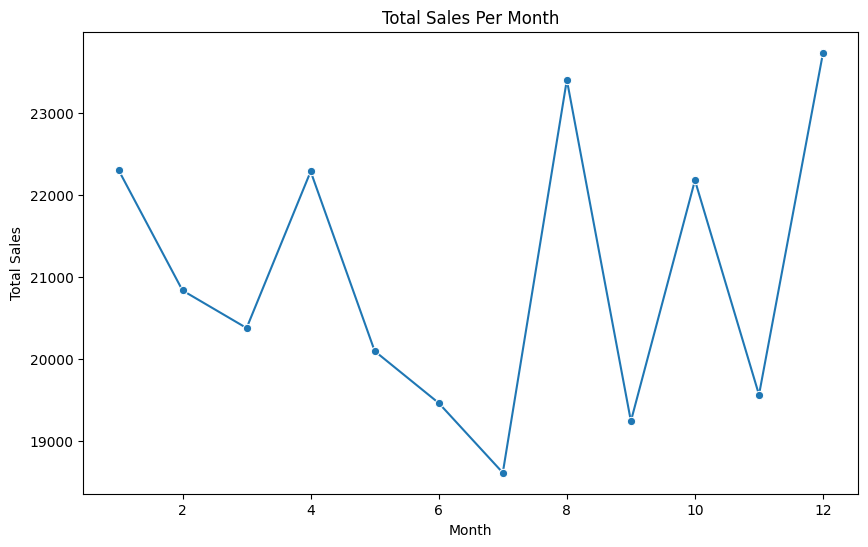

   CustomerID  PurchaseAmount  Cluster
0         103      411.204965        1
1         436      133.729287        0
2         861       10.504445        0
3         271       87.879759        0
4         107      239.584314        0


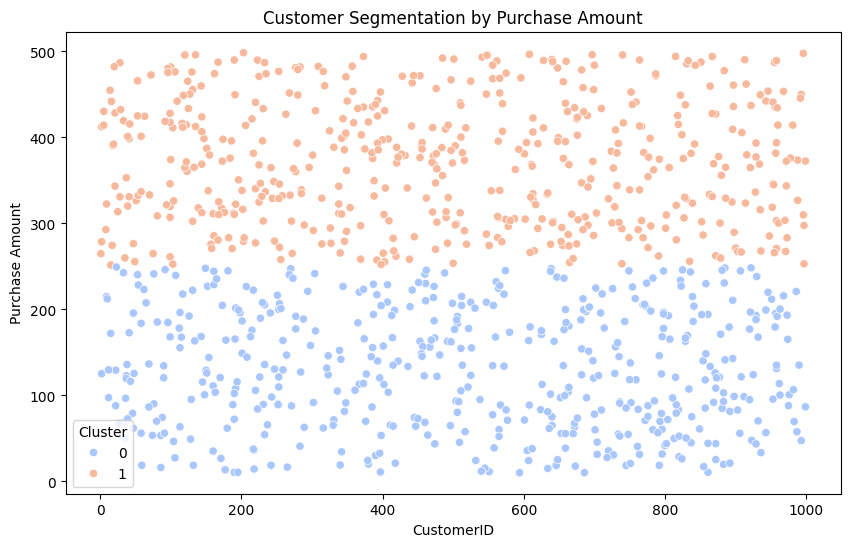

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


ValueError: The allowed values for a DataFrame are True, False, 0, 1. Found value 2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from mlxtend.frequent_patterns import apriori, association_rules

# Generating random transaction data
np.random.seed(42)

# Create a list of products
products = ['Product_A', 'Product_B', 'Product_C', 'Product_D', 'Product_E', 'Product_F', 'Product_G']

# Simulate customer transactions
num_customers = 1000
customer_ids = np.random.choice(range(1, num_customers+1), size=num_customers)
purchase_dates = pd.to_datetime(np.random.choice(pd.date_range('2023-01-01', '2023-12-31', freq='D'), size=num_customers))
purchase_amounts = np.random.uniform(10, 500, size=num_customers)  # Random purchase amounts between 10 and 500
products_bought = np.random.choice(products, size=num_customers)

# Create a DataFrame
df = pd.DataFrame({
    'CustomerID': customer_ids,
    'PurchaseDate': purchase_dates,
    'PurchaseAmount': purchase_amounts,
    'Product': products_bought
})

# Show the first few rows of the dataset
print(df.head())

# EDA - Distribution of Purchase Amounts
plt.figure(figsize=(10,6))
sns.histplot(df['PurchaseAmount'], bins=30, kde=True)
plt.title('Distribution of Purchase Amounts')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()

# EDA - Number of purchases by product
plt.figure(figsize=(10,6))
sns.countplot(x='Product', data=df, palette='viridis')
plt.title('Number of Purchases by Product')
plt.xlabel('Product')
plt.ylabel('Number of Purchases')
plt.show()

# EDA - Purchase trends over time (monthly)
df['Month'] = df['PurchaseDate'].dt.month
monthly_sales = df.groupby('Month')['PurchaseAmount'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(x='Month', y='PurchaseAmount', data=monthly_sales, marker='o')
plt.title('Total Sales Per Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

# Segmentation - Clustering customers based on purchase amount
scaler = StandardScaler()
df_cluster = df[['CustomerID', 'PurchaseAmount']].drop_duplicates()

# Scaling the data
df_cluster_scaled = scaler.fit_transform(df_cluster[['PurchaseAmount']])

# Apply KMeans clustering (2 clusters for simplicity)
kmeans = KMeans(n_clusters=2, random_state=42)
df_cluster['Cluster'] = kmeans.fit_predict(df_cluster_scaled)

# Show the clustered data
print(df_cluster.head())

# Plotting the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x='CustomerID', y='PurchaseAmount', hue='Cluster', data=df_cluster, palette='coolwarm')
plt.title('Customer Segmentation by Purchase Amount')
plt.xlabel('CustomerID')
plt.ylabel('Purchase Amount')
plt.show()

# Market Basket Analysis - One-hot encoding for Apriori
basket = pd.get_dummies(df['Product'])
basket = basket.groupby(df['CustomerID']).sum()

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(basket, min_support=0.05, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Show the top association rules
print(rules.sort_values('lift', ascending=False).head())



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   CustomerID PurchaseDate  PurchaseAmount    Product
0         861   2023-04-05      143.397866  Product_A
1        3773   2023-07-28      198.238771  Product_D
2        3093   2023-08-13      419.608390  Product_E
3         467   2023-12-14       82.830276  Product_A
4        4427   2023-11-17      233.517783  Product_E


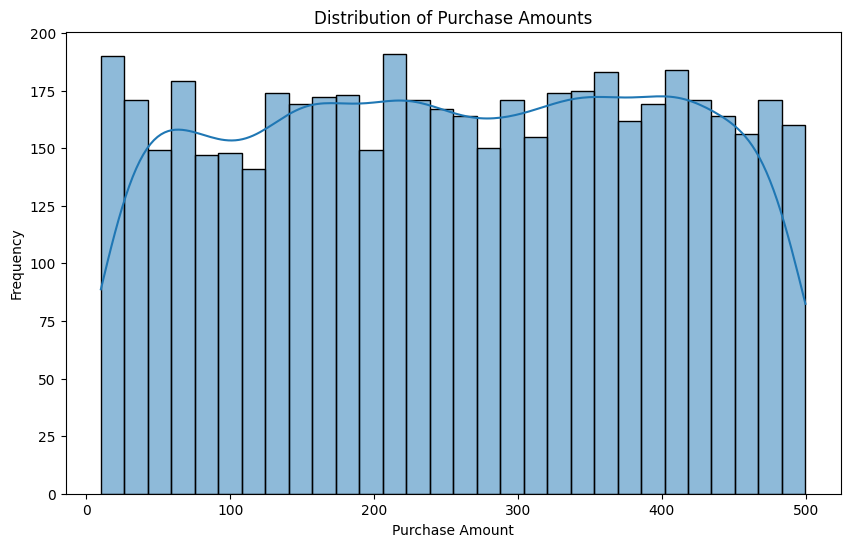

<ipython-input-12-a2ae3d5209d0>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Product', data=df, palette='viridis')


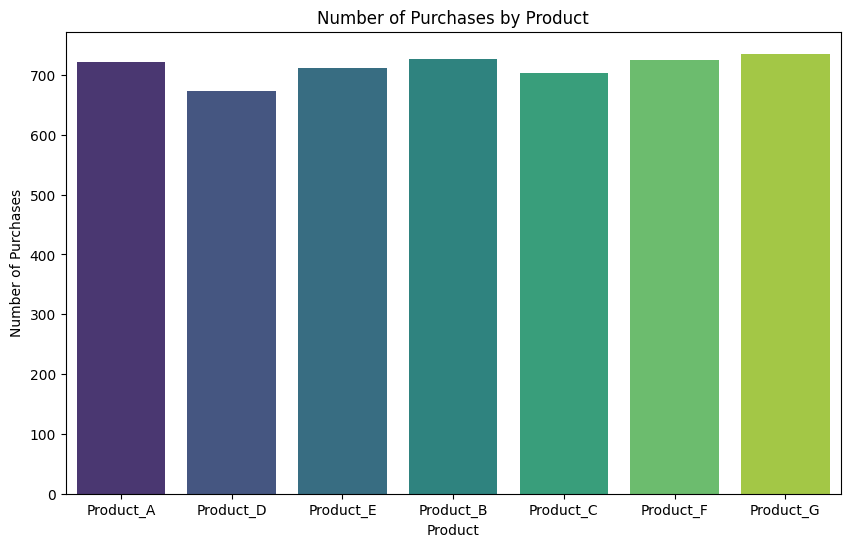

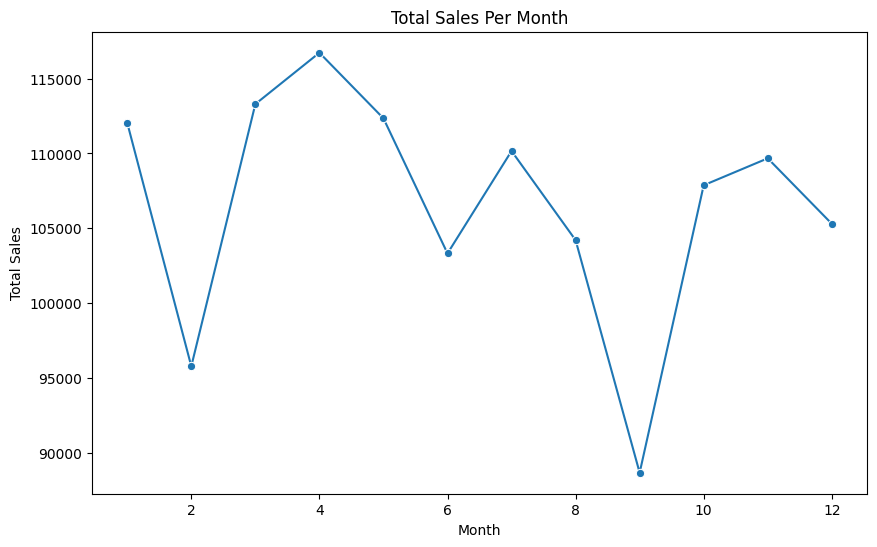

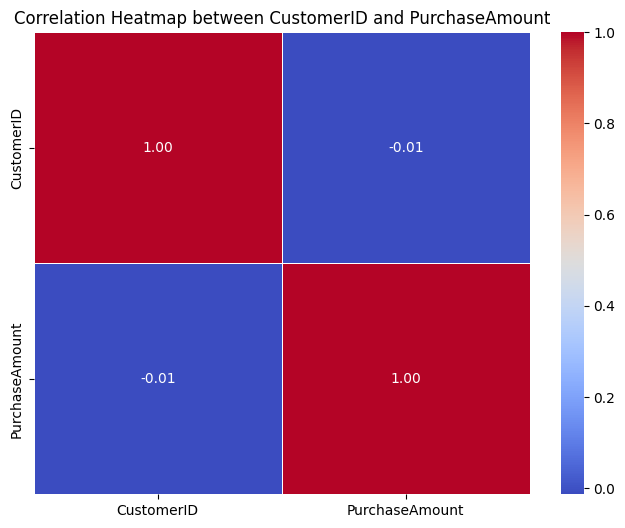

   CustomerID  PurchaseAmount  Cluster
0         861      143.397866        2
1        3773      198.238771        1
2        3093      419.608390        0
3         467       82.830276        2
4        4427      233.517783        1


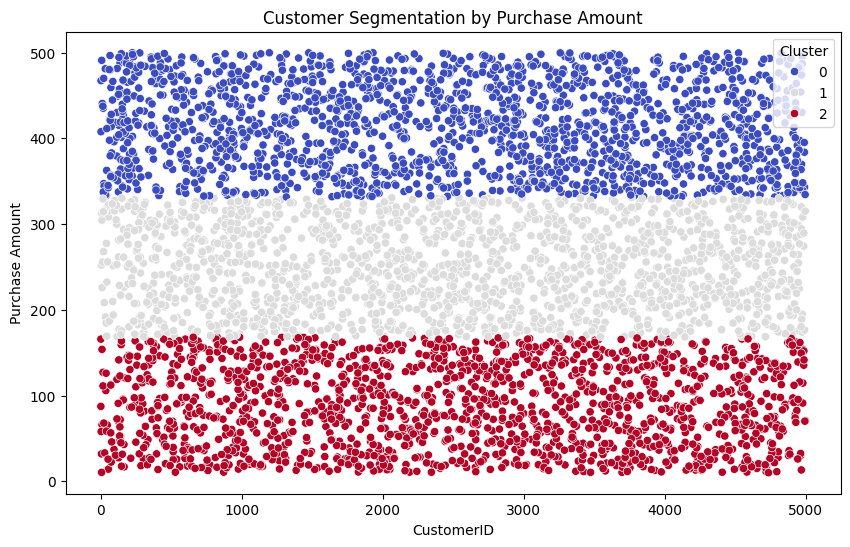

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


ValueError: The allowed values for a DataFrame are True, False, 0, 1. Found value 2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from mlxtend.frequent_patterns import apriori, association_rules

# Generate random customer transaction data
np.random.seed(42)

# Create a list of products
products = ['Product_A', 'Product_B', 'Product_C', 'Product_D', 'Product_E', 'Product_F', 'Product_G']

# Simulate customer transactions
num_customers = 5000
customer_ids = np.random.choice(range(1, num_customers+1), size=num_customers)
purchase_dates = pd.to_datetime(np.random.choice(pd.date_range('2023-01-01', '2023-12-31', freq='D'), size=num_customers))
purchase_amounts = np.random.uniform(10, 500, size=num_customers)  # Random purchase amounts between 10 and 500
products_bought = np.random.choice(products, size=num_customers)

# Create a DataFrame
df = pd.DataFrame({
    'CustomerID': customer_ids,
    'PurchaseDate': purchase_dates,
    'PurchaseAmount': purchase_amounts,
    'Product': products_bought
})

# Show the first few rows of the dataset
print(df.head())

# EDA - Distribution of Purchase Amounts
plt.figure(figsize=(10,6))
sns.histplot(df['PurchaseAmount'], bins=30, kde=True)
plt.title('Distribution of Purchase Amounts')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()

# EDA - Number of purchases by product
plt.figure(figsize=(10,6))
sns.countplot(x='Product', data=df, palette='viridis')
plt.title('Number of Purchases by Product')
plt.xlabel('Product')
plt.ylabel('Number of Purchases')
plt.show()

# EDA - Purchase trends over time (monthly)
df['Month'] = df['PurchaseDate'].dt.month
monthly_sales = df.groupby('Month')['PurchaseAmount'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(x='Month', y='PurchaseAmount', data=monthly_sales, marker='o')
plt.title('Total Sales Per Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

# Correlation Heatmap
# We'll use 'PurchaseAmount' and 'CustomerID' for the correlation analysis
correlation_matrix = df[['CustomerID', 'PurchaseAmount']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap between CustomerID and PurchaseAmount')
plt.show()

# Segmentation - Clustering customers based on purchase amount
scaler = StandardScaler()
df_cluster = df[['CustomerID', 'PurchaseAmount']].drop_duplicates()

# Scaling the data
df_cluster_scaled = scaler.fit_transform(df_cluster[['PurchaseAmount']])

# Apply KMeans clustering (3 clusters for simplicity)
kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster['Cluster'] = kmeans.fit_predict(df_cluster_scaled)

# Show the clustered data
print(df_cluster.head())

# Plotting the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x='CustomerID', y='PurchaseAmount', hue='Cluster', data=df_cluster, palette='coolwarm')
plt.title('Customer Segmentation by Purchase Amount')
plt.xlabel('CustomerID')
plt.ylabel('Purchase Amount')
plt.show()

# Market Basket Analysis - One-hot encoding for Apriori
basket = pd.get_dummies(df['Product'])
basket = basket.groupby(df['CustomerID']).sum()

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(basket, min_support=0.05, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Show the top association rules
print(rules.sort_values('lift', ascending=False).head())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7345 - loss: 0.7642 - val_accuracy: 0.8550 - val_loss: 0.4217
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8501 - loss: 0.4238 - val_accuracy: 0.8629 - val_loss: 0.3854
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8620 - loss: 0.3802 - val_accuracy: 0.8673 - val_loss: 0.3661
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8685 - loss: 0.3602 - val_accuracy: 0.8746 - val_loss: 0.3522
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8779 - loss: 0.3389 - val_accuracy: 0.8778 - val_loss: 0.3397
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8716 - loss: 0.3597
Test accuracy: 0.868399977684021


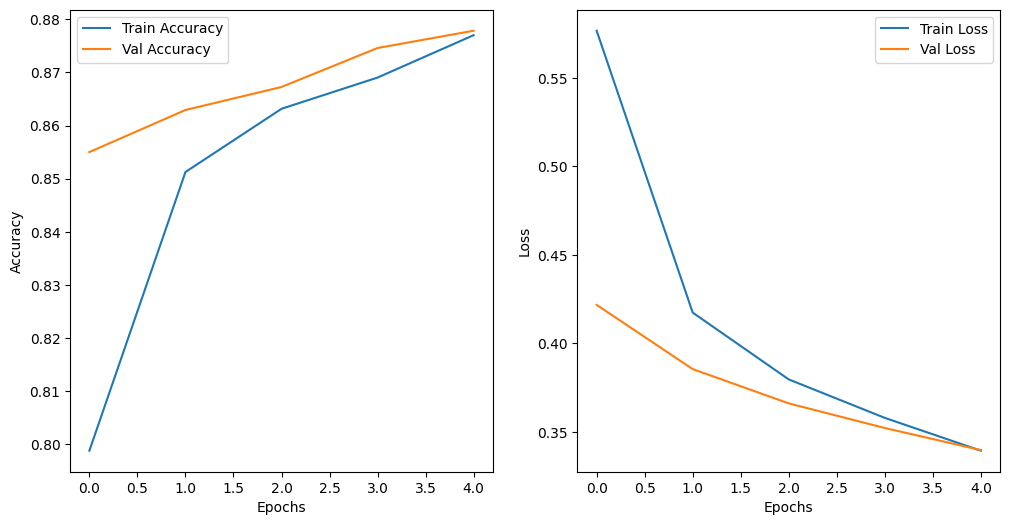

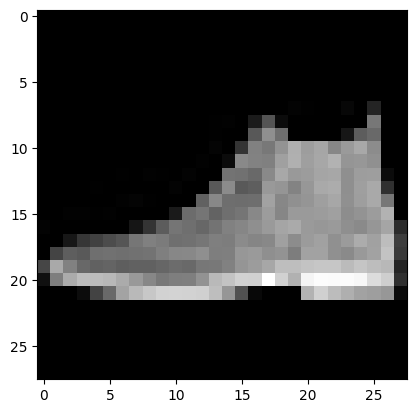

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
Predicted label: 9


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


import numpy as np
plt.imshow(test_images[0], cmap='gray')
plt.show()

prediction = model.predict(test_images[0].reshape(1, 28, 28))
predicted_label = np.argmax(prediction)
print(f"Predicted label: {predicted_label}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
